In [1]:
import os
import argparse
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.amp import GradScaler, autocast        
from torch.optim.lr_scheduler import CosineAnnealingLR  
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from yacs.config import CfgNode as CN

from data import make_dataset, transform_map
from eval import evaluate
from model import UModel, EigenCAM
from torch_utils import ema_update, freeze_layers, visualize_salience_map
from utils import setup, clean_exp_savedir

In [2]:
cfg = CN(new_allowed=True)
cfg.merge_from_file("config.yaml")

source_train_loader, target_train_loader, source_test_loader, target_test_loader = (
    make_dataset(
        source_dataset=cfg.dataset.source,
        target_dataset=cfg.dataset.target,
        imgsize=cfg.img_size,
        train_bs=cfg.domain_adapt.train_bs,
        eval_bs=cfg.domain_adapt.eval_bs,
        num_workers=cfg.domain_adapt.num_workers,
    )
)

model = UModel(
    backbone=cfg.model.backbone.type,
    hidden_dim=cfg.model.backbone.hidden_dim,
    out_dim=cfg.dataset.num_classes,
    imgsize=cfg.img_size,
    freeze_backbone=cfg.model.backbone.freeze,
)

device = torch.device(cfg.device)
ckpt = torch.load("runs/new_28_10/nnRid5/da_best_64.34.pth")
model.load_state_dict(ckpt['model_state_dict'])
model = model.to(device)

from model import EigenCAM

cam = EigenCAM(model.eval(), target_layer=model.backbone.transformer.blocks[-1].norm2)
cam.register_hook()

Loaded pretrained weights.


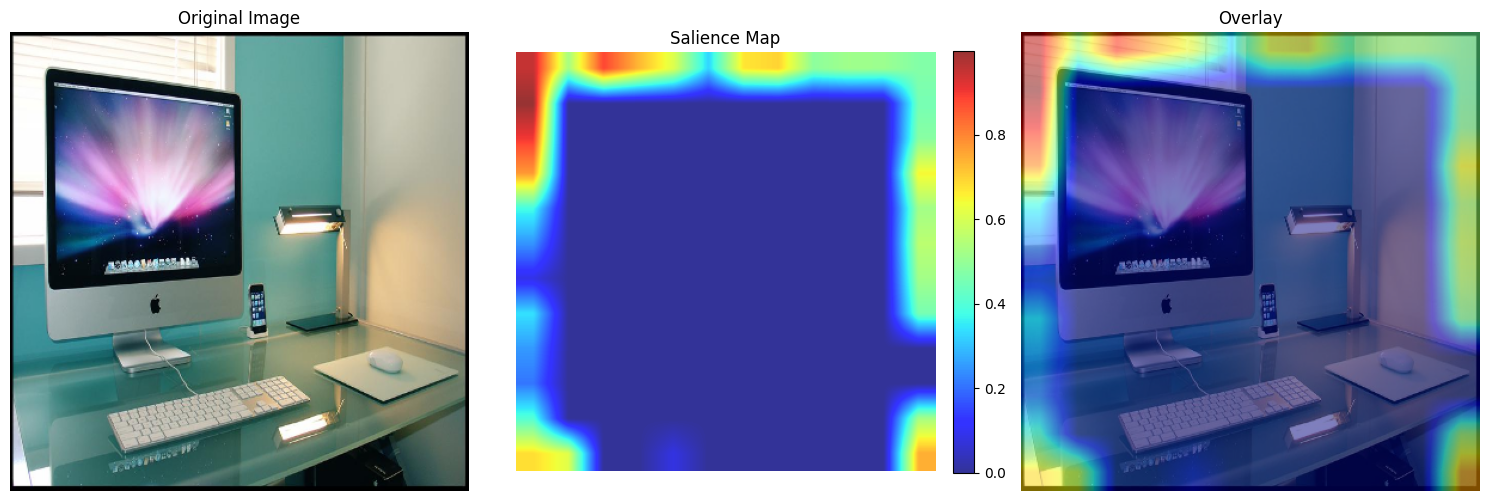

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
test_image_path = "data/OfficeHome/Art/Computer/00014.jpg"
visualize_salience_map(
    input_path=test_image_path,
    cam=cam,
    vr_branch="src",
    head_branch="src",
    device=device,
    outpath=None,
    img_size=384
)


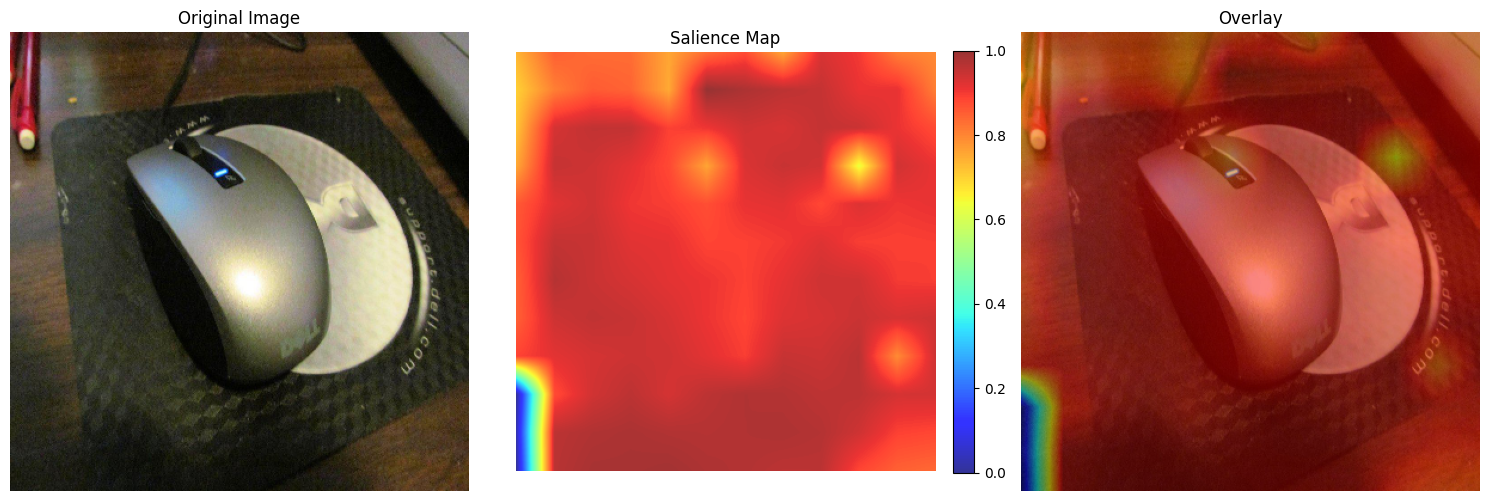

In [6]:
img_resized, salience_resized, overlay = visualize_salience_map(
    input_path="data/OfficeHome/Art/Mouse/00015.jpg",
    model=model,
    cam=cam1,
    device=device,
    img_size=384
)

In [7]:
visualize_salience_map(
    input_path="data/OfficeHome/Clipart/Computer/00083.jpg",
    cam=cam,
    vr_branch="tch", 
    head_branch="tch",
    device=device,
    outpath = "vis/tgt_data_src_branch.jpg",
    img_size=384
)


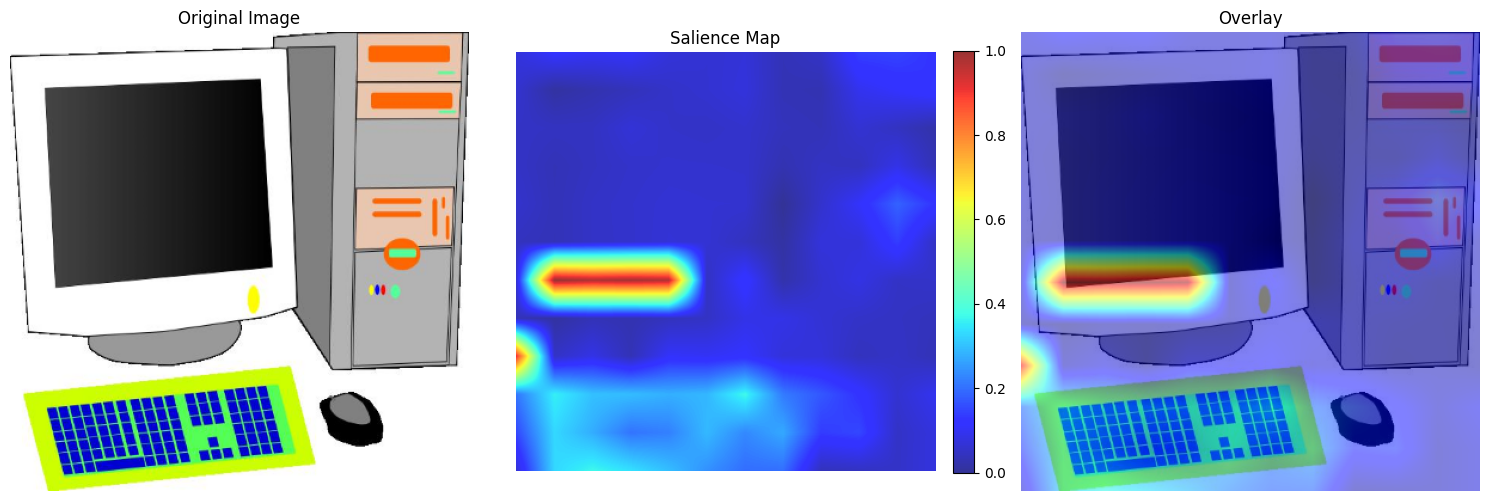

In [8]:
img_resized, salience_resized, overlay = visualize_salience_map(
    input_path="data/OfficeHome/Clipart/Monitor/00022.jpg",
    model=model,
    cam=cam1,
    device=device,
    img_size=384
)


In [ ]:
test_image_path = "data/OfficeHome/Art/Computer/00014.jpg"
img_resized, salience_resized, overlay = visualize_salience_map(
    input_path=test_image_path,
    model=model,
    cam=cam,
    device=device,
    img_size=384
)

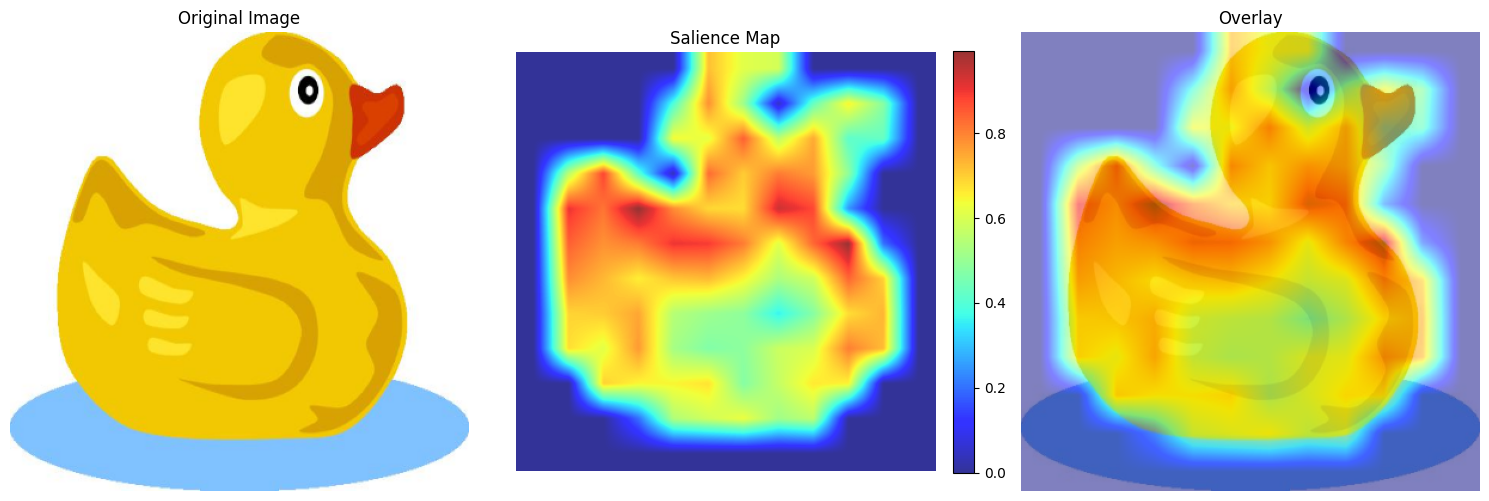

In [6]:
img_resized, salience_resized, overlay = visualize_salience_map(
    input_path="data/OfficeHome/Clipart/Toys/00016.jpg",
    model=model,
    cam=cam,
    device=device,
    img_size=384
)